In [ ]:
LetsGrowMore
Name : UMA MAHESWARI

Task 2 :  Stock Market Prediction And Forecasting Using Stacked LSTM

Level 1 : Beginner level 

### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

In [3]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [6]:
df1=df.reset_index()['High']

In [7]:
df1

0       235.95
1       236.80
2       240.00
3       236.75
4       239.20
         ...  
2030    119.50
2031    121.00
2032    121.95
2033    122.00
2034    123.00
Name: High, Length: 2035, dtype: float64

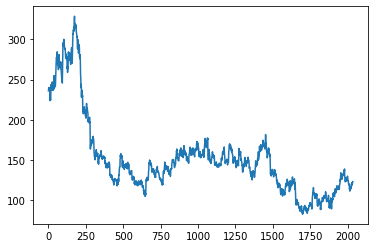

In [8]:
import matplotlib.pyplot as plt
plt.plot(df1)

### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [9]:
import numpy as np

In [10]:
df1

0       235.95
1       236.80
2       240.00
3       236.75
4       239.20
         ...  
2030    119.50
2031    121.00
2032    121.95
2033    122.00
2034    123.00
Name: High, Length: 2035, dtype: float64

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
df1

array([[0.62268754],
       [0.62614353],
       [0.6391543 ],
       ...,
       [0.15917869],
       [0.15938199],
       [0.16344786]])

In [13]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
training_size,test_size

(1322, 713)

In [17]:
train_data

array([[0.62268754],
       [0.62614353],
       [0.6391543 ],
       ...,
       [0.25594633],
       [0.26794064],
       [0.24883106]])

In [18]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [19]:
# reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [20]:
print(X_train.shape), print(y_train.shape)

(1221, 100)
(1221,)


(None, None)

In [21]:
print(X_test.shape), print(ytest.shape)

(612, 100)
(612,)


(None, None)

In [22]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [23]:
import math
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [24]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 42s 632ms/step - loss: 0.0392 - val_loss: 0.0035
Epoch 2/100
20/20 [==============================] - 8s 381ms/step - loss: 0.0041 - val_loss: 0.0013
Epoch 3/100
20/20 [==============================] - 8s 381ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 4/100
20/20 [==============================] - 8s 380ms/step - loss: 0.0015 - val_loss: 0.0010
Epoch 5/100
20/20 [==============================] - 8s 381ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 6/100
20/20 [==============================] - 8s 382ms/step - loss: 0.0013 - val_loss: 9.8900e-04
Epoch 7/100
20/20 [==============================] - 8s 381ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 8/100
20/20 [==============================] - 8s 382ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 9/100
20/20 [==============================] - 8s 380ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 10/100
20/20 [==============================] - 8s 380ms/step - loss: 0.0010 - v

In [27]:
import tensorflow as tf

In [28]:
tf.__version__

'2.8.0'

In [29]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [30]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [31]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

170.09973116933983

In [32]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

118.68405420770561

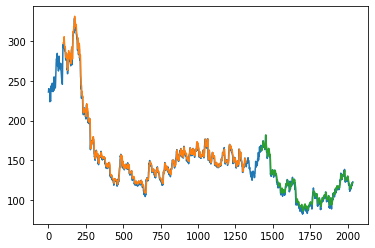

In [33]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [34]:
len(test_data)

713

In [35]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 372)

In [36]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [37]:
temp_input

[0.047977231144541554,
 0.05122992478145966,
 0.048790404553771094,
 0.049400284610693235,
 0.04614759097377519,
 0.04838381784915635,
 0.05122992478145966,
 0.05773531205529581,
 0.048790404553771094,
 0.036999390119943076,
 0.035982923358406194,
 0.03252693636918069,
 0.027241309209188824,
 0.027647895913803566,
 0.02785118926611102,
 0.035169749949176654,
 0.030494002846106927,
 0.02073592193535273,
 0.017889815003049425,
 0.013417361252287041,
 0.03394998983533237,
 0.03069729619841427,
 0.03171376295995115,
 0.027444602561496223,
 0.03171376295995115,
 0.030290709493799528,
 0.03394998983533237,
 0.035576336653791396,
 0.040658670461475865,
 0.04025208375686118,
 0.023988615572270777,
 0.009758080910754197,
 0.014433828013823924,
 0.006098800569221352,
 0.000813173409229484,
 0.002439520227688563,
 0.0,
 0.0026428135799959618,
 0.00426916039845493,
 0.0038625736938401878,
 0.010774547672291135,
 0.013214067899979642,
 0.01992274852612319,
 0.02703801585688148,
 0.02724130920918882

In [43]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [45]:
import matplotlib.pyplot as plt

In [46]:
len(df1)

2035

In [51]:
df1=scaler.inverse_transform(df1).tolist()

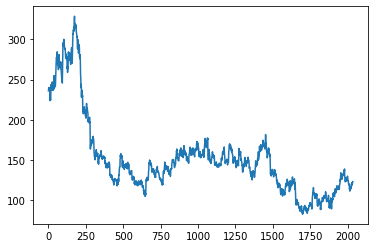

In [53]:
plt.plot(df1)